# 1.1 Preparing the data sets

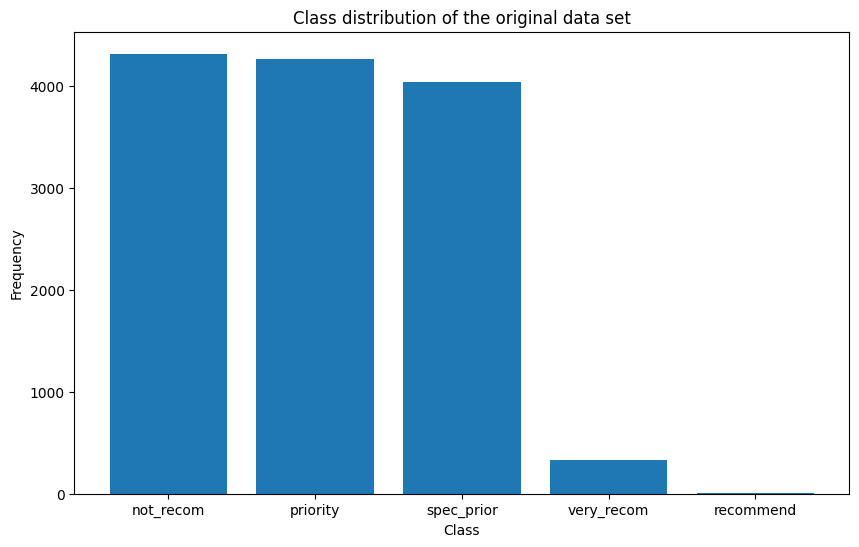

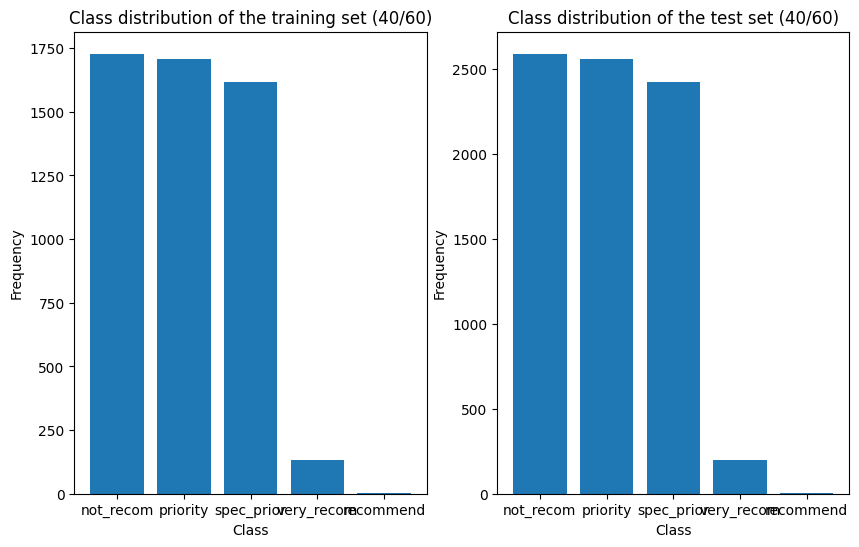

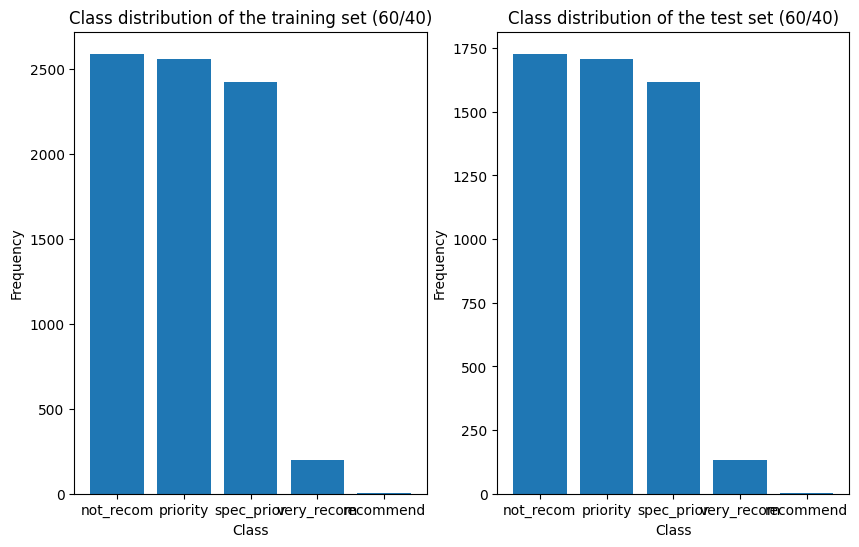

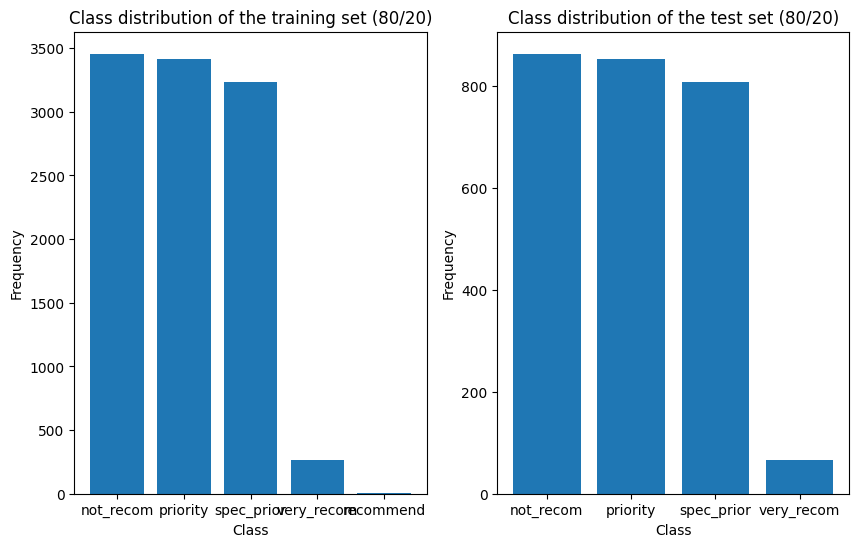

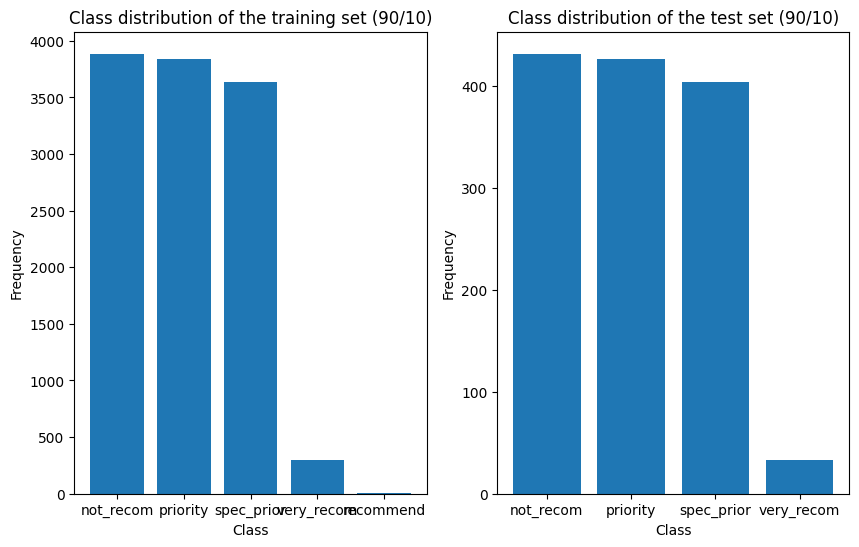

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv("nursery.data.csv", header=None)

data.columns = ["parents", "has_nurs", "form", "children", "housing", "finance", "social", "health", "class"]

X = data.drop("class", axis=1)
y = data["class"]

proportions = [0.4, 0.6, 0.8, 0.9]

subsets = {}

for p in proportions:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=p, stratify=y, random_state=42)
    feature_train = X_train.to_numpy()
    label_train = y_train.to_numpy()
    feature_test = X_test.to_numpy()
    label_test = y_test.to_numpy()
    subsets[p] = (feature_train, label_train, feature_test, label_test)

def plot_class_distribution(data, title):
    counts = data.value_counts()
    plt.bar(counts.index, counts.values)
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.title(title)

plt.figure(figsize=(10, 6))
plot_class_distribution(y, "Class distribution of the original data set")
plt.show()

for p in proportions:
    feature_train, label_train, feature_test, label_test = subsets[p]
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plot_class_distribution(pd.Series(label_train), f"Class distribution of the training set ({round(p*100)}/{round((1-p)*100)})")
    plt.subplot(1, 2, 2)
    plot_class_distribution(pd.Series(label_test), f"Class distribution of the test set ({round(p*100)}/{round((1-p)*100)})")
    plt.show()


# 1.2 Building the decision tree classifiers

In [2]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

X_encoded = pd.get_dummies(X)

for p in proportions:
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, train_size=p, stratify=y, random_state=42)
    feature_train = X_train.to_numpy()
    label_train = y_train.to_numpy()
    feature_test = X_test.to_numpy()
    label_test = y_test.to_numpy()
    subsets[p] = (feature_train, label_train, feature_test, label_test)

for p in proportions:
    feature_train, label_train, feature_test, label_test = subsets[p]
    
    clf = DecisionTreeClassifier(criterion="entropy")
    
    clf.fit(feature_train, label_train)
    
    dot_data = export_graphviz(clf, out_file=None, feature_names=X_encoded.columns, class_names=clf.classes_, filled=True)
    graph = graphviz.Source(dot_data)
    graph.render(f"decision_tree_{p}")
    

# 1.3 Evaluating the decision tree classifiers

In [3]:
from sklearn.metrics import classification_report, confusion_matrix

for p in proportions:
    feature_train, label_train, feature_test, label_test = subsets[p]
    
    clf = DecisionTreeClassifier(criterion="entropy")
    
    clf.fit(feature_train, label_train)
    
    y_pred = clf.predict(feature_test)
    
    print(f"Classification report for proportion {p}:")
    print(classification_report(label_test, y_pred))
    
    print(f"Confusion matrix for proportion {p}:")
    print(confusion_matrix(label_test, y_pred))
    print('\n--------------------------------\n')


Classification report for proportion 0.4:
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00      2592
    priority       0.97      0.98      0.98      2560
   recommend       1.00      1.00      1.00         1
  spec_prior       0.98      0.97      0.98      2426
  very_recom       1.00      0.99      0.99       197

    accuracy                           0.98      7776
   macro avg       0.99      0.99      0.99      7776
weighted avg       0.98      0.98      0.98      7776

Confusion matrix for proportion 0.4:
[[2592    0    0    0    0]
 [   0 2504    0   56    0]
 [   0    0    1    0    0]
 [   0   63    0 2363    0]
 [   0    2    0    0  195]]

--------------------------------

Classification report for proportion 0.6:
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00      1728
    priority       0.99      0.99      0.99      1706
   recommend       1.00      1.00      1.00        

# 1.4 The depth and accuracy of a decision tree

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

feature_train, label_train, feature_test, label_test = subsets[0.8]

max_depth_values = [None, 2, 3, 4, 5, 6, 7]

accuracy_scores = {}

for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    
    clf.fit(feature_train, label_train)
    
    y_pred = clf.predict(feature_test)
    
    accuracy = accuracy_score(label_test, y_pred)
    
    accuracy_scores[max_depth] = accuracy
    
    dot_data = export_graphviz(clf, out_file=None, feature_names=X_encoded.columns, class_names=clf.classes_, filled=True)
    graph = graphviz.Source(dot_data)
    graph.render(f"decision_tree_{max_depth}")

print("Accuracy scores for different max_depth values:")
for max_depth, accuracy in accuracy_scores.items():
    print(f"max_depth = {max_depth}: {accuracy:.4f}")


Accuracy scores for different max_depth values:
max_depth = None: 0.9961
max_depth = 2: 0.7635
max_depth = 3: 0.8098
max_depth = 4: 0.8488
max_depth = 5: 0.8727
max_depth = 6: 0.8854
max_depth = 7: 0.9097
